### WEEK 4: FRIDAY LAB 03

Assignment (10 points): Now that you are familiar with Cosine Similarity, Chi Square, Covariance, and Correlation, use Python (in Google Colab) to determine which three attributes in your assigned dataset are most closely associated.

    1. Be sure that your code works and is clearly written and commented. (5 points) 
    2. Then, answer the following questions ABOUT YOUR CODE (not as a general definition) in either comments or markdown:
        1. How did you decide which attributes to pick for your analysis? (1 point)
        2. What connections between the attributes do the results of your analysis reveal?  Were there any surprises? (2points)
        3. Would you be able to predict future values of one attribute from a correlation with one or two others? Research how you could do this in your chosen language and try it out. (2 points)

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity


#Reading in the Bank Marketing dataset. ,
bank = pd.read_csv('https://raw.githubusercontent.com/mdfarhankhan196/Mohammed__IT533/master/data/bank-full.csv', sep=';')
#Verifying that we can see the data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Three attributes are loan, campaign and duration

In [44]:
# change data type to determine the various associationsin chi square
bank['loan'] = bank['loan'].astype("category")


bank.dtypes[['loan']]

loan    category
dtype: object

In [45]:
# Compute Cosine Similarity for Campaign and duration numeric data types
# Here is a solution that uses the spatial package from scipy

a = np.array(bank.campaign)
b = np.array(bank.duration)

result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.4267486325243497 64.73860355690039


In [46]:
# Computing Chi Square for the loan and the duration for 
chi2, p, dof, expected = chi2_contingency((pd.crosstab(bank.loan, bank.duration).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 1582.351014148924 ,p-value: 0.4222721897609127, Degrees of Freedom: 1572


In [47]:
# Computing Chi Square for the loan and the Campaign for 
chi2, p, dof, expected = chi2_contingency((pd.crosstab(bank.loan, bank.campaign).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 48.33959408803385 ,p-value: 0.4185725505615515, Degrees of Freedom: 47


In [48]:
# Compute the Covariance of the campaign and the duration
np.cov([bank.campaign], [bank.duration], bias = True)[0][1]

-67.47030141278134

In [49]:
#Compute the correlation for the entire numeric attribute in the dataset
corr = bank.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


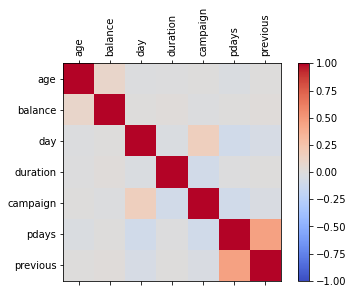

In [37]:
#Plot a heatmap for the numeric data types correlation
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [38]:
# correlation between the campaign and duration
bank['campaign'].corr(bank['duration'])

-0.08456950273006171

2. 
       1. 


        In order to carry out all the Measures of association i choose associated attributes from the dataset two numeric and one categorical campaign and duration and the categorical data loan.

2. 
       2. 


        In the measures of association covariance revealved that both campaign and duration have a negative covariance which means as one attribute the other reduces in both attributes. It was suprising to see how both independent campaign and duration with the loan.


2. 
        2. 
        
        Yes we would be able to predict future values of one attribute from a correlation with another variable. i could predict it by determining both the coveriance and the correlation to determine the nature of their relationship for instance the balance.

In [52]:
# Compute the Covariance of the campaign and the balance
np.cov([bank.campaign], [bank.balance], bias = True)[0][1]

-137.51019088488283

In [53]:
# correlation between the campaign and balance
bank['campaign'].corr(bank['balance'])

-0.014578278850766227

This shows that as the campaign continues to grow the balance future can be predicted to reduce also